# House Prices: Advanced Regression Techniques

In this notebook, we build regression models to predict house prices.

Let's first import required packages

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats

pd.set_option('display.max_columns', None)

## Dataset

**General understanding of the data**

In this dataset, we have a total of 80 features

In [2]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')
print('Training set shape:', df_train.shape)
print('Test set shape:', df_test.shape)

Training set shape: (1460, 81)
Test set shape: (1459, 80)


In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
df_train.describe(include = 'all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

We immediately notice that few features have missing values

In [29]:
def count_missing_values(df):
    
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)
    df_missing = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
    
    return df_missing

In [30]:
df_missing = count_missing_values(df_train)
df_missing.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


**Exploring the target variable**

Let's explore the target variable, SalePrice

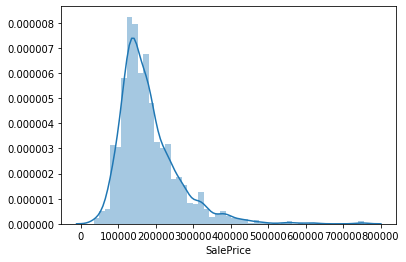

In [7]:
sns.distplot(df_train['SalePrice'])

Let's calculate the skewness and kurtosis of the SalePrice values

In [8]:
print('Skewness: %.4f' % df_train['SalePrice'].skew())
print('Kurtosis: %.4f' % df_train['SalePrice'].kurt())

Skewness: 1.8829
Kurtosis: 6.5363


## Feature Selection

**Correlation: selecting features**

Now, let's calculate the correlation matrix to see which features are correlated with SalePrice, helping us figure out features with strong predictive powers.

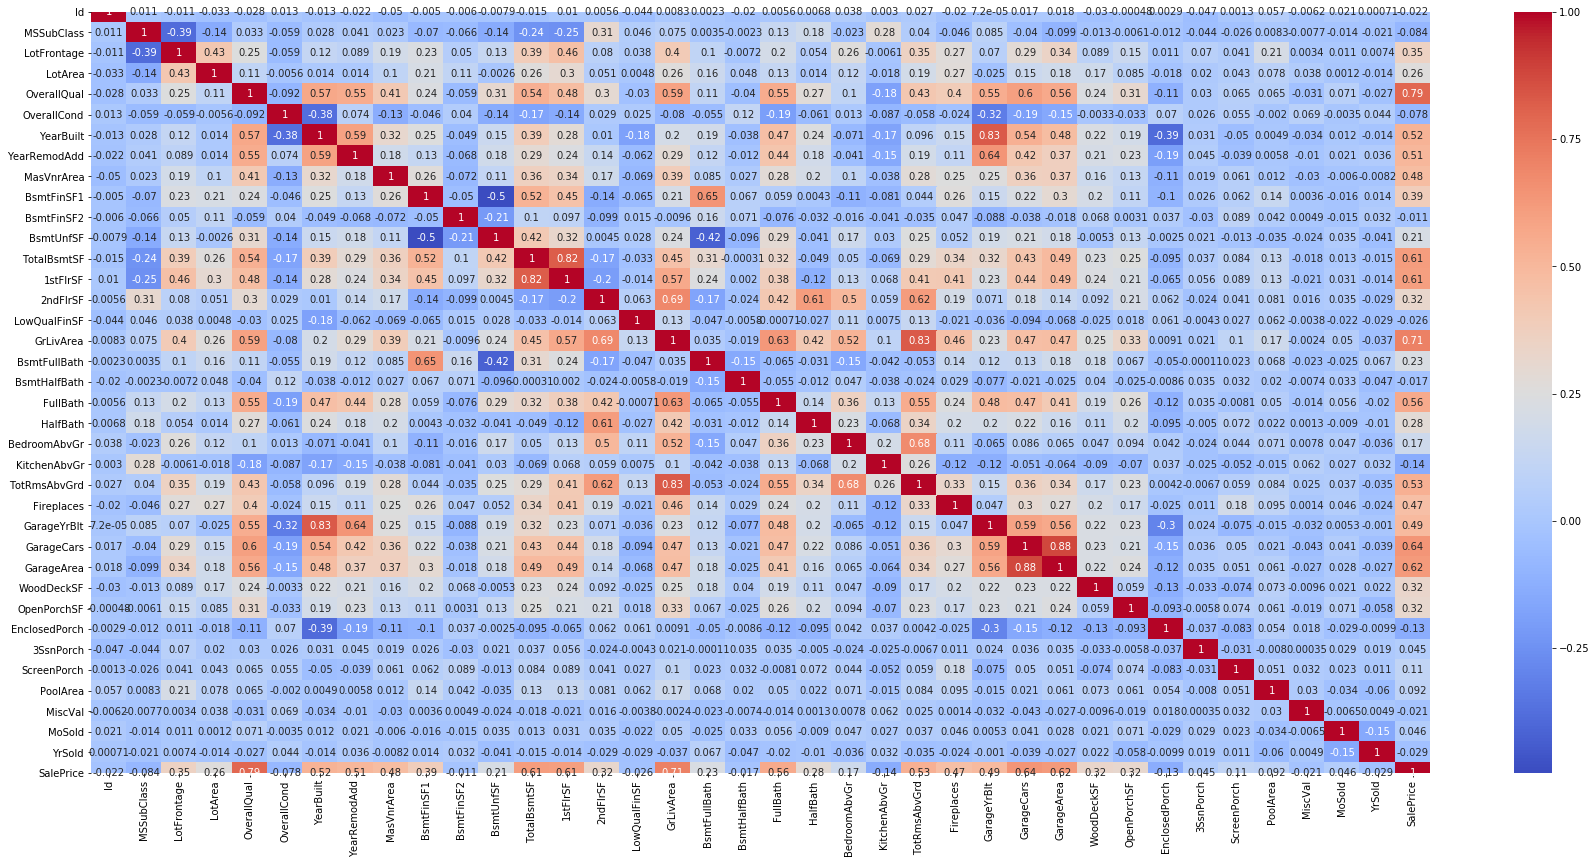

In [9]:
plt.figure(figsize = (30,14))
sns.heatmap(df_train.corr(), cmap = 'coolwarm', annot = True)
plt.show()

The dark red boxes off the diagonal shows the existence of correlation between features. To name a few:
 - TotalBsmtSF - 1stFlrSF: 0.82
 - GarageArea - GarageCars: 0.88

Now, let's focus on the features that are at least moderately correlated with the SalePrice, with correlation > 0.5

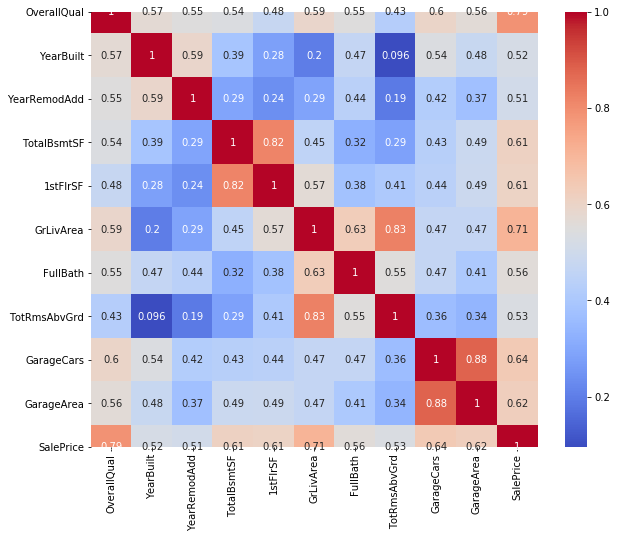

In [10]:
corr_mat = df_train.corr()
top_corr_features = corr_mat.index[abs(corr_mat['SalePrice']) > 0.5]

plt.figure(figsize = (10,8))
sns.heatmap(df_train[top_corr_features].corr(), annot = True, cmap = 'coolwarm')

We have ten features, which are either moderately or highly correlated with the SalePrice. However, we observe these pairs of features that are correlated to each other
 - GarageCars-GarageArea (0.88)
 - GrLivArea-TotalRmsAbvGrd (0.83)
 - 1stFlrSF-TotalBsmtSF (0.82)
 - YearBuilt-YearRemodAdd (0.59)

Out of these pairs, we choose GarageCars, GrLivArea, 1stFlrSF and YearBuilt as our features, as these are more correlated with the SalePrice as compared to their pair features. Thus, our features to build the regression model are:

In [11]:
features = ['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'GarageCars']

Now, let look at the scatter plot of SalePrice against features

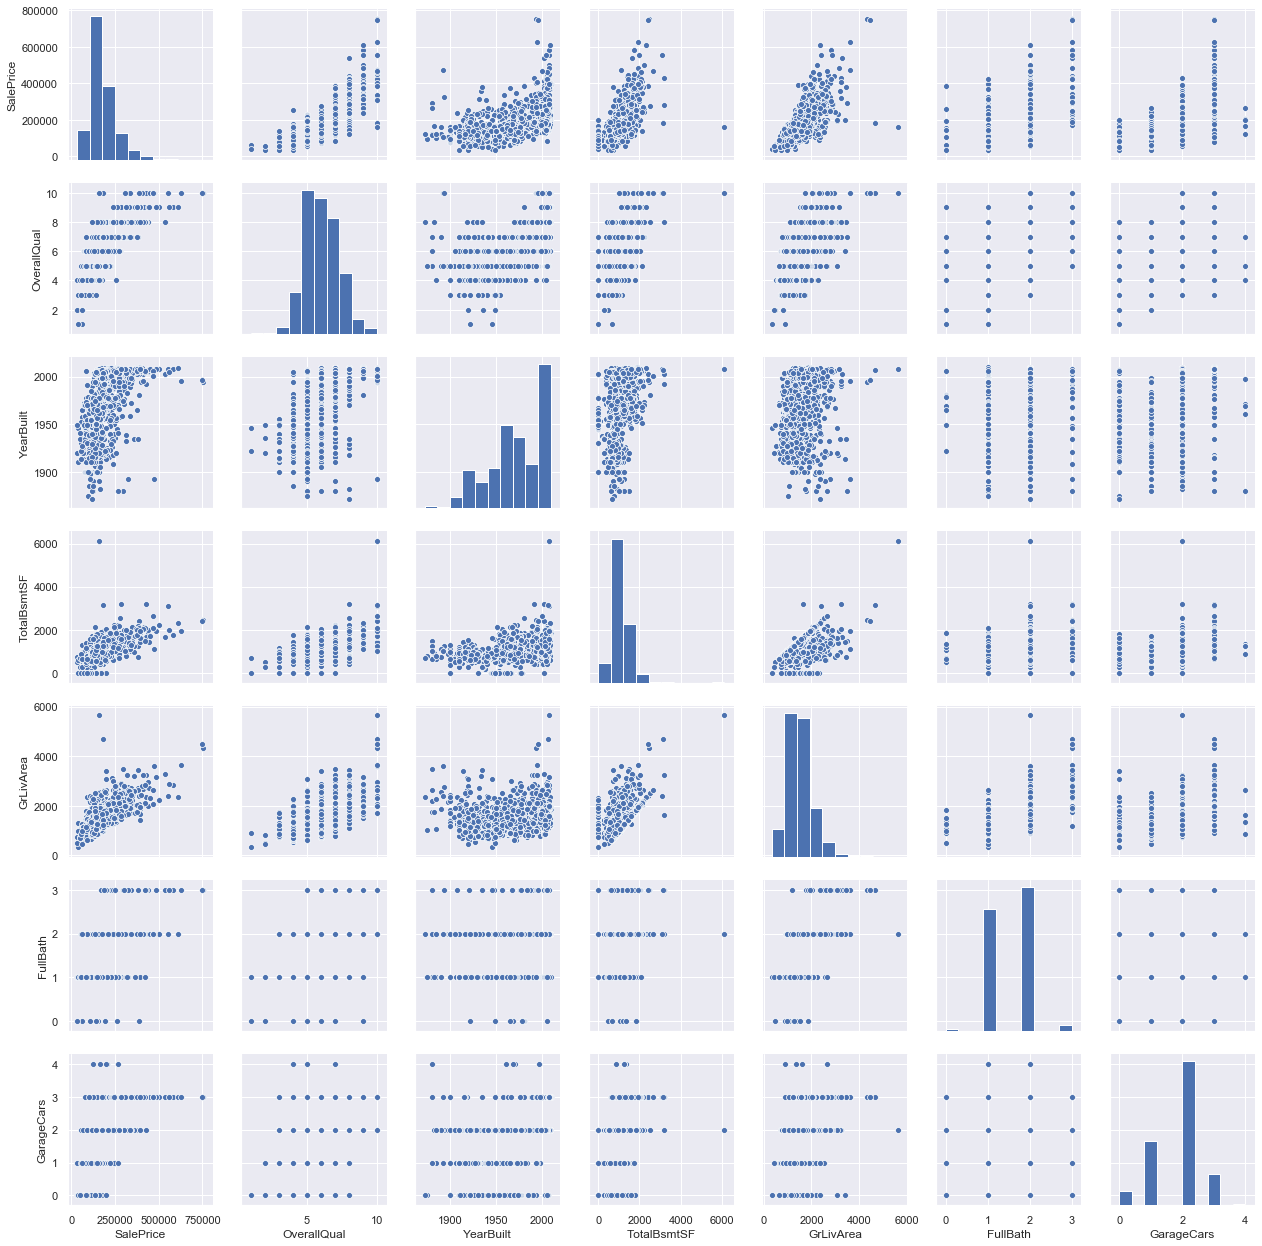

In [12]:
sns.set()
columns = ['SalePrice'] + features
sns.pairplot(df_train[columns], height = 2.5)
plt.show()

**ToDo: How categorial variables are taken into account in calculating correlation ?. Are we missing important categorical variables in this analysis ? My understanding is that we choose them by looking at the box plots**

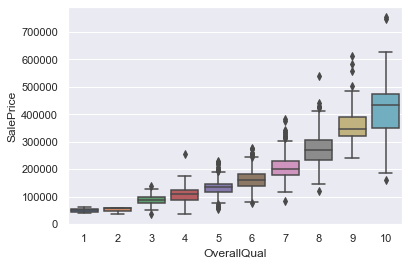

In [15]:
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = df_train)

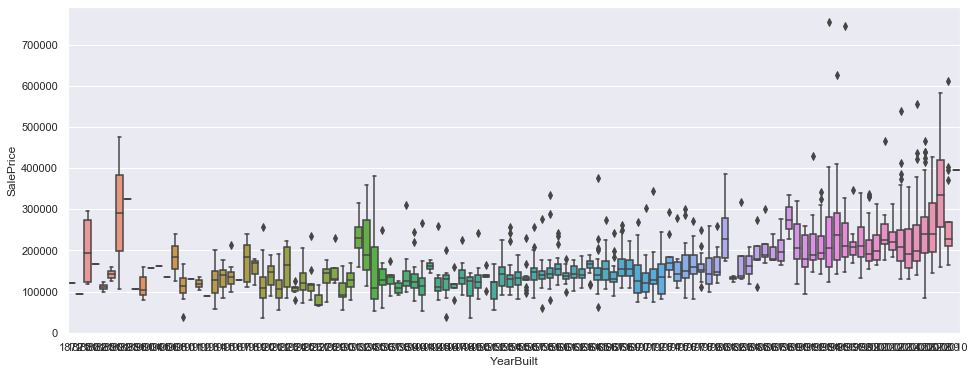

In [16]:
plt.figure(figsize = (16,6))
sns.boxplot(x = 'YearBuilt', y = 'SalePrice', data = df_train)

**Assumptions of mutivariate analysis**

Now, we test the assumptions underlying the statistical bases for multivariate analysis. We will be testing four assumptions:
 - Normality: data should look like a normal distribution
 - Homoscedasticity: dependent variable exhibit equal level of variance across the range of predictor's variables
 - Linearity
 - Absence of correlated errors

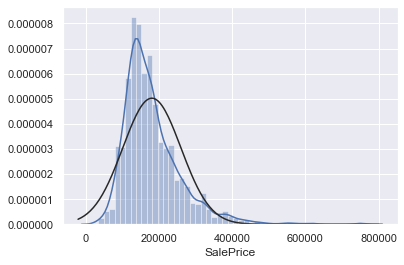

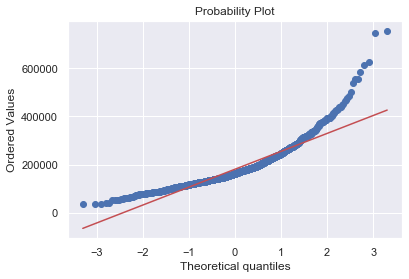

In [32]:
sns.distplot(df_train['SalePrice'], fit = stats.norm)

fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot = plt)

In [33]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])

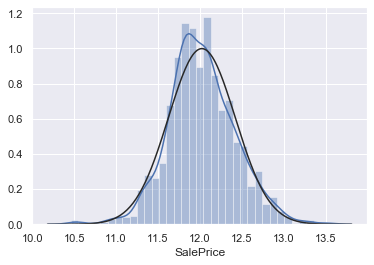

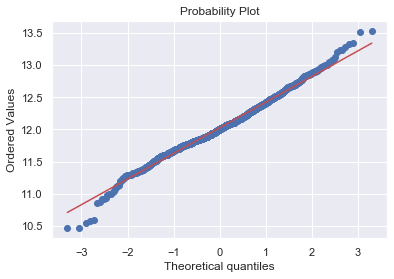

In [34]:
sns.distplot(df_train['SalePrice'], fit = stats.norm)

fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot = plt)

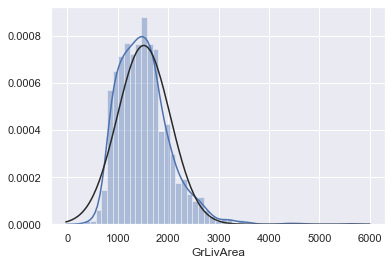

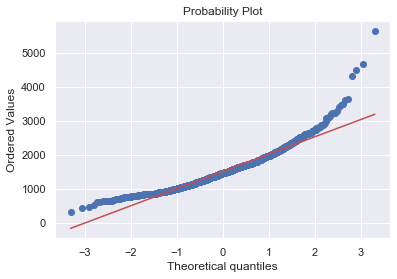

In [35]:
sns.distplot(df_train['GrLivArea'], fit = stats.norm)
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot = plt)

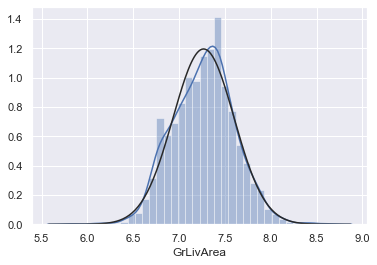

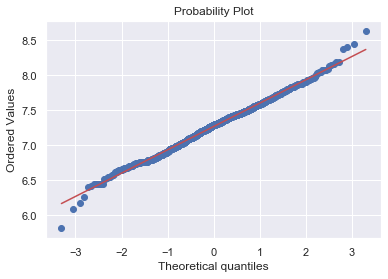

In [36]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

sns.distplot(df_train['GrLivArea'], fit = stats.norm)
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot = plt)

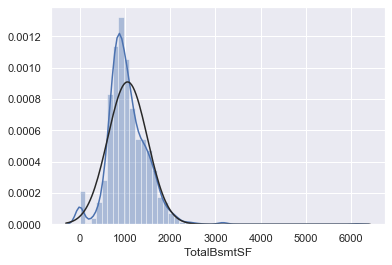

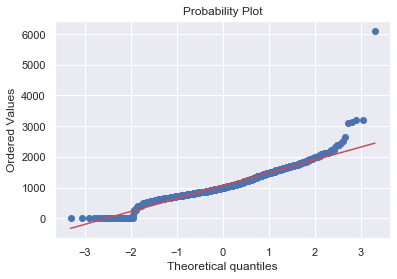

In [37]:
sns.distplot(df_train['TotalBsmtSF'], fit = stats.norm)
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot = plt)

In [38]:
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index = df_train.index)
df_train['HasBsmt'] = 0
df_train.loc[df_train['TotalBsmtSF'] > 0, 'HasBsmt'] = 1

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


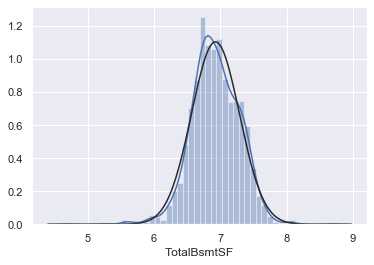

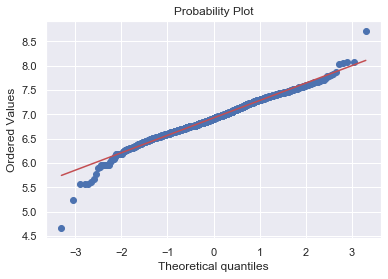

In [39]:
df_train.loc[df_train['HasBsmt'] == 1, 'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

sns.distplot(df_train[df_train['TotalBsmtSF'] > 0]['TotalBsmtSF'], fit = stats.norm)
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF'] > 0]['TotalBsmtSF'], plot = plt)

## Outliers

## Modeling

In [23]:
selected_columns = features + ['SalePrice']
df = df_train[selected_columns]
df.shape

(1460, 7)

In [24]:
df.head()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageCars,SalePrice
0,7,2003,856,1710,2,2,208500
1,6,1976,1262,1262,2,2,181500
2,7,2001,920,1786,2,2,223500
3,7,1915,756,1717,1,3,140000
4,8,2000,1145,2198,2,3,250000


In [31]:
df_missing = count_missing_values(df)

We do not have any missing entry for these features. Make sure that this is actually the case. It could be that missing values may have been represented by something else that does not count towards null.

We note that SalePrice deviates from the normal distribution, with positive skewness.

Mean = 180921.20, Standard deviation = 79415.29


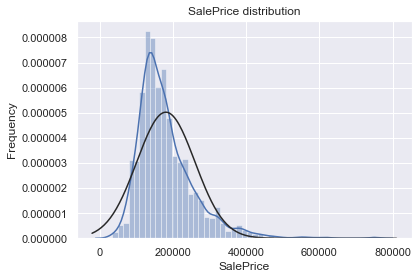

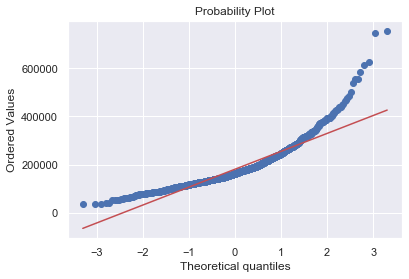

In [17]:
sns.distplot(df_train['SalePrice'], fit = stats.norm)
plt.title('SalePrice distribution')
plt.ylabel('Frequency')

fig = plt.figure(figsize = (6,4))
res = stats.probplot(df_train['SalePrice'], plot = plt)

mean, std = stats.norm.fit(df_train['SalePrice'])
print('Mean = %.2f, Standard deviation = %.2f' % (mean, std))

We note that the SalePrice value is right skewed, and we will have to make it normally distributed.

<br>**Feature selection**



In [18]:
#plt.figure(figsize = (6,4))
#df_train.plot(x = 'OverallQual', y = 'SalePrice', kind = 'scatter')

In [19]:
#plt.figure(figsize = (6,4))
#df_train.plot(x = 'GrLivArea', y = 'SalePrice', kind = 'scatter')

In [20]:
#plt.figure(figsize = (6,4))
#sns.boxplot(x = 'GarageCars', y = 'SalePrice', data = df_train)

In [21]:
#plt.figure(figsize = (6,4))
#sns.barplot(x = 'FullBath', y = 'SalePrice', data = df_train)
#plt.show()

**Missing data**